In [3]:
import pandas as pd 
import numpy as np
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt
import os 


os.chdir('/Users/kajaltiwary/ANLY_645_Project/')

In [4]:
#laod all the dataset 
Node = pd.read_csv('data/Node_info.csv')
Edge = pd.read_csv('data/Edge_info.csv')
dat2 = pd.read_csv('data/Song_attribute.csv')
Edge.head()

,edge,edge_weight
0,"('J. Cole', 'Drake')",2.0
1,"('Meek Mill', 'Drake')",0.0
2,"('DJ Khaled', 'Drake')",0.0
3,"('Rick Ross', 'Drake')",10.0
4,"('Wale', 'Drake')",0.0


In [5]:
#extrac the data needed 
Nodes = Node['node'].tolist()
Node_size = Node['node_size'].tolist()
Node_color = Node['node_color'].tolist()
#print(Node_color)
Edges = Edge['edge'].tolist()

# Make edges tuples
new_edges = []
for x in Edges:
    x = x[1:-1]
    x = x.split(", ")
    z = []
    for y in x:
        y = y[1:-1]
        z.append(y)
    z = tuple(z)
    new_edges.append(z)
    
Edges = new_edges

Edge_weights = Edge['edge_weight'].tolist()

In [6]:
#build up the network 
G = nx.Graph() 

#Prepare node attributesm it make take a whike 
#use dictionary to retreive all artists songs 
Art = {}
keys1 = list(Nodes)
#add sub dictionary for each artist 
for i in keys1:
    Art[i] = {}
#add each artists songs to their dictionaries 
for key in keys1:
    for index, rows in dat2.iterrows():
        if rows.artist == key:
            Art[key][rows.song_name] = rows.song_info


#add node and weight
for i in range(len(Nodes)):
    G.add_node(Nodes[i], weight = Node_size[i], songs = Art[Nodes[i]],diversity = Node_color[i])
#add edge and weight 
G.add_edges_from(Edges)

#make edge weights more mutual 
for i in range(len(Edge_weights)):
    if Edge_weights[i] == 0:
        Edge_weights[i] = 2
    elif Edge_weights[i] == 1:
        Edge_weights[i] = 3
    elif Edge_weights[i] == 2:
        Edge_weights[i] = 4
    elif Edge_weights[i] == 3:
        Edge_weights[i] = 5
    elif Edge_weights[i] > 3:
        Edge_weights[i] = 7

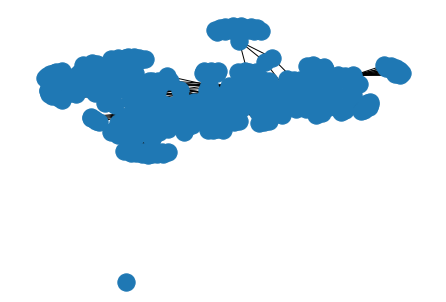

In [7]:
nx.draw(G)

# Network Analysis

Average Degree:  6.243792325056433
GENERAL
	number of nodes: 443
	number of edges: 1383
	is_directed: False
	is_weighted: False
	number_connected_components 1
	number of triangle:  443
	density: 0.014126226979765686
	average_clustering coefficient:  0.31140704321400153
	degree_assortativity_coefficient:  -0.37605424965054113
	is_tree: False
	diameter: 7
	radius: 4
	average_shortest_path_length:  3.9400426953208787
DEGREE (NORMALIZED)
	min: 0.0022624434389140274
	mean: 0.014126226979765689
	median: 0.004524886877828055
	max: 0.07918552036199096
	top nodes: ['PnB Rock', 'Lil Yachty', 'Quavo', 'NAV', 'Rick Ross', 'Freddie Gibbs']
	           [0.07918552036199096, 0.07692307692307693, 0.07466063348416291, 0.07466063348416291, 0.07239819004524888, 0.07239819004524888]
CLOSENESS CENTRALITY
	min: 0.20898345153664302
	mean: 0.2585582334132601
	median: 0.25070901871809415
	max: 0.36378600823045265
	top nodes: ['AAP Ferg', 'Quavo', '2 Chainz', 'Drake', 'Post Malone', 'Young Thug']
	           [0

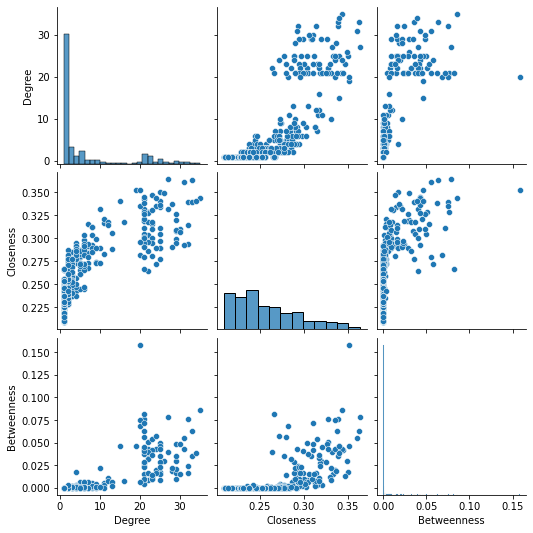

In [8]:
import nx_tools as nxt
import shutil
import random
from importlib import reload  # Python 3.4+
import os
import seaborn as sns
import math

# Isolate GCC
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

#def build_output_folder(out_dir_path):
    #if(os.path.exists(out_dir_path)):
        #shutil.rmtree(out_dir_path)
    #os.mkdir(out_dir_path)

output_folder="outputs"
#build_output_folder(output_folder)

output_root = "network_analysis_cent_corr"
nxt.ave_degree(G0)
nxt.network_summary(G0)
nxt.plot_centrality_correlation(G0,path=output_folder+"/"+output_root+".pdf")

# Community Detection

In [9]:
# Create Partitions
import itertools
partition_sequence = nx.community.girvan_newman(G0)
ps = []
k = round(G0.number_of_nodes()-1)
for i in range(0,k):
    
    ps.append(tuple(sorted(c) for c in next(partition_sequence)))

modularity_sequence = [nx.community.quality.modularity(G0, p) for p in ps]


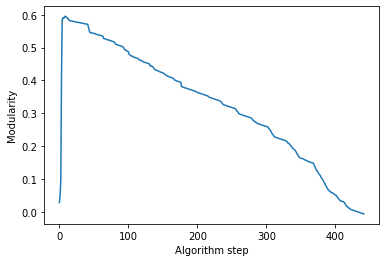

In [10]:
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')
plt.savefig("community_detection_modularity_plot.png")

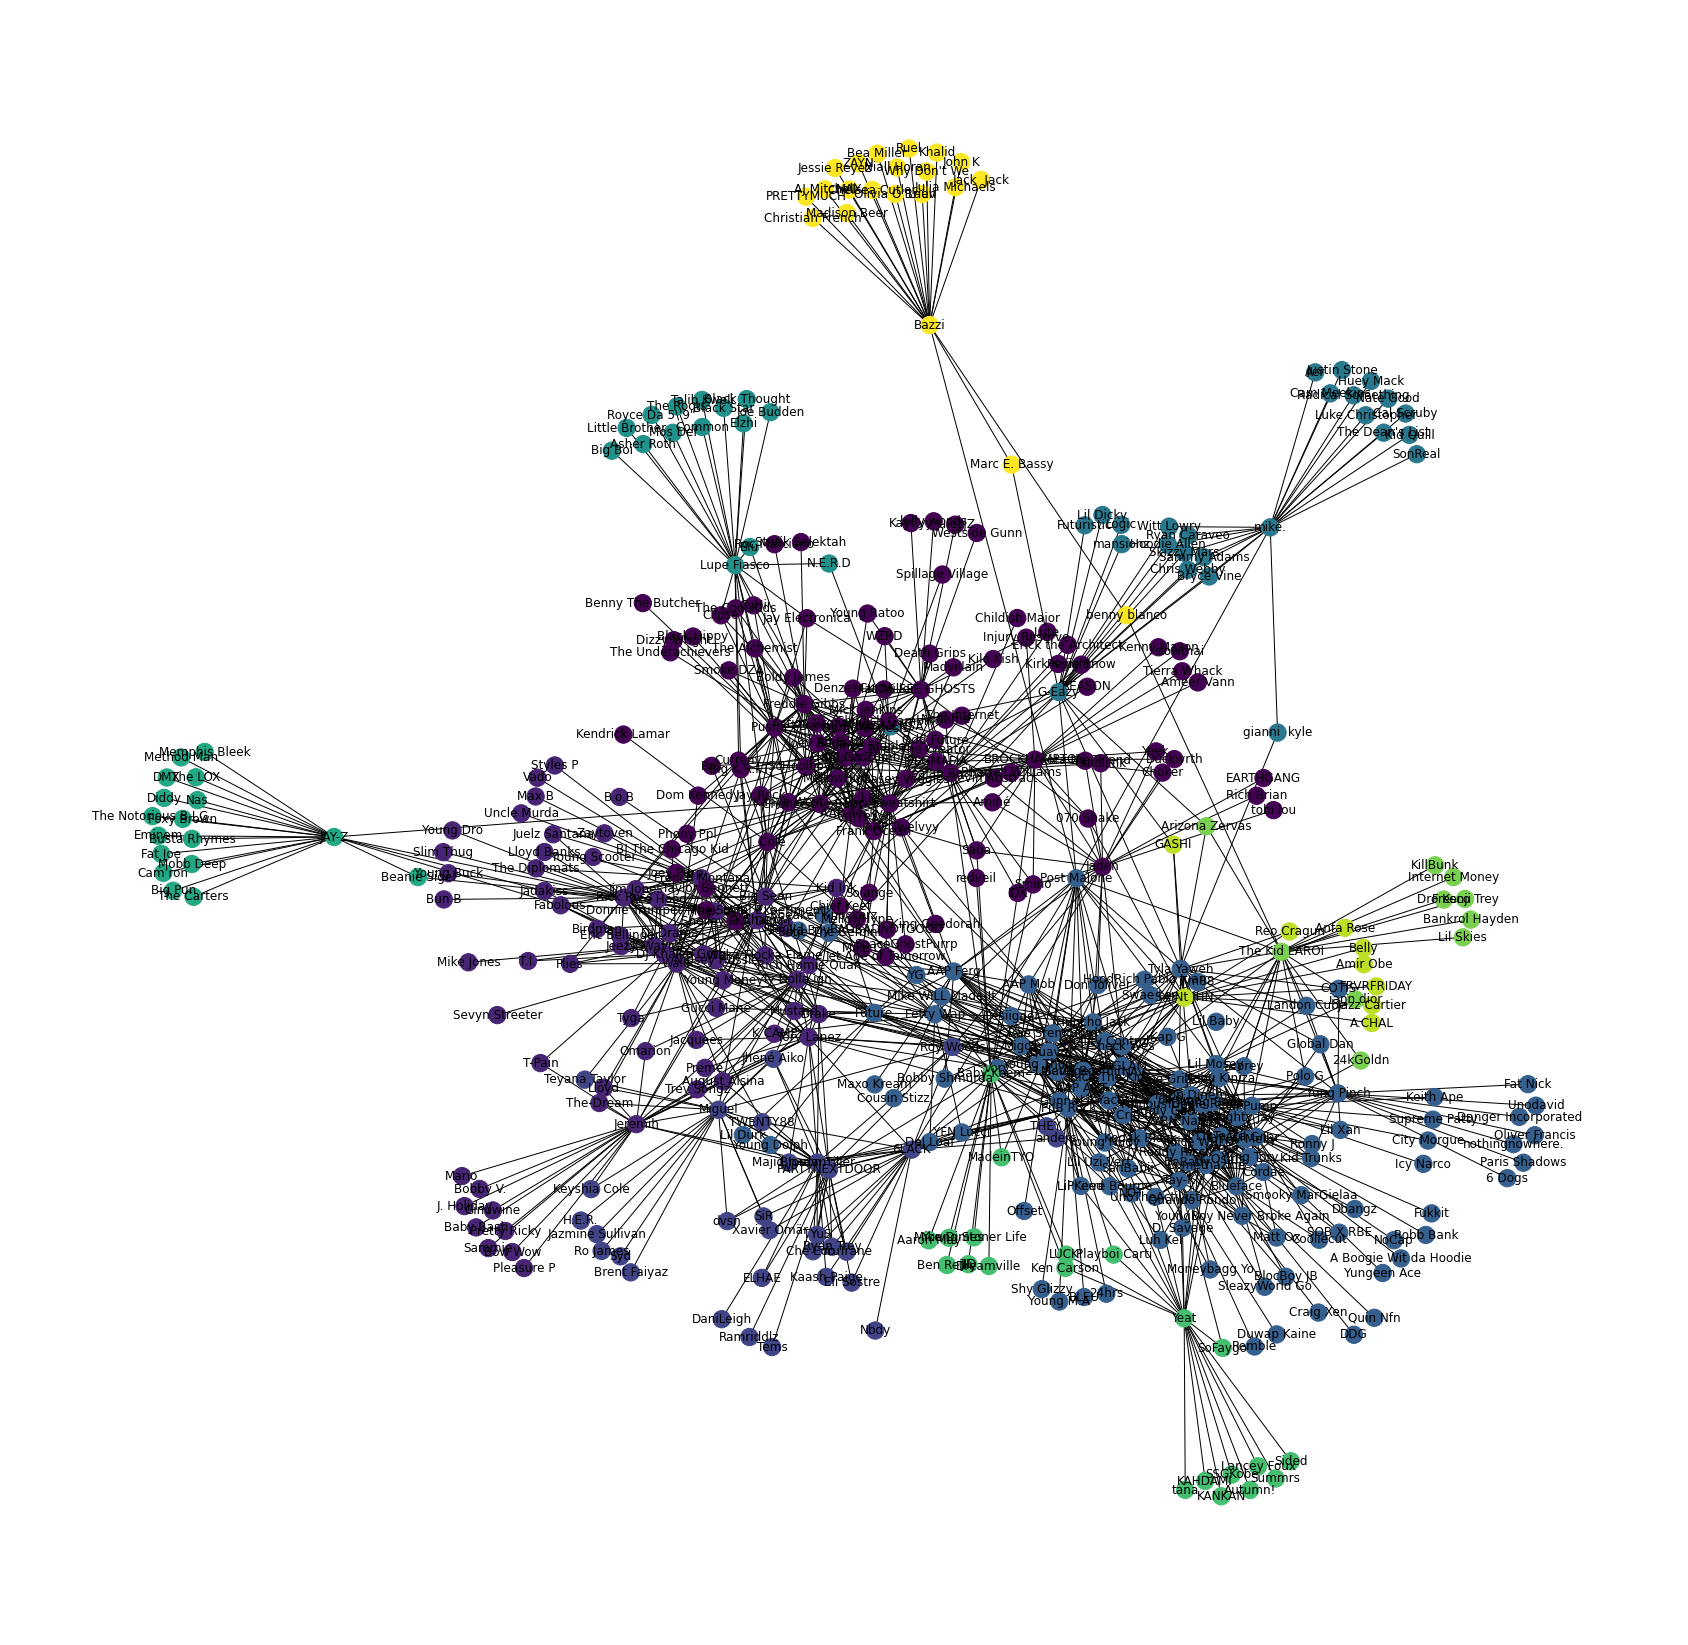

In [11]:
index_max = max(range(len(modularity_sequence)), key=modularity_sequence.__getitem__)
best_partition = ps[index_max]

def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map
fig, ax = plt.subplots(figsize=(30,30))
best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G0.nodes()]
nx.draw(G0, with_labels=True, node_color=node_colors)
plt.savefig("communities.png")

In [12]:
nx.community.quality.modularity(G0, best_partition)

0.5953809009201182

In [13]:
nx.is_connected(G)

False

In [14]:
nx.is_connected(G0)

True

In [15]:
best_partition_map

{'070 Shake': 0,
 'AAP Rocky': 0,
 'AAP Twelvyy': 0,
 'Ab-Soul': 0,
 'Action Bronson': 0,
 'Ameer Vann': 0,
 'Aminé': 0,
 'BADBADNOTGOOD': 0,
 'BJ The Chicago Kid': 0,
 'BROCKHAMPTON': 0,
 'Bas': 0,
 'Benny The Butcher': 0,
 'Big K.R.I.T.': 0,
 'Black Hippy': 0,
 'Boldy James': 0,
 'Casey Veggies': 0,
 'Chance the Rapper': 0,
 'Chief Keef': 0,
 'Childish Gambino': 0,
 'Childish Major': 0,
 'Choker': 0,
 'Clipse': 0,
 'Curreny': 0,
 'CyHi': 0,
 'Danny Brown': 0,
 'Death Grips': 0,
 'Denzel Curry': 0,
 'Dizzy Wright': 0,
 'Dom Kennedy': 0,
 'Domo Genesis': 0,
 'Donnie Trumpet  The Social Experiment': 0,
 'Duckwrth': 0,
 'EARTHGANG': 0,
 'Earl Sweatshirt': 0,
 'Erick the Architect': 0,
 'Flatbush Zombies': 0,
 'Frank Ocean': 0,
 'Freddie Gibbs': 0,
 'GoldLink': 0,
 'IDK': 0,
 'Injury Reserve': 0,
 'Isaiah Rashad': 0,
 'J. Cole': 0,
 'JPEGMAFIA': 0,
 'Jaden': 0,
 'Jay Electronica': 0,
 'Jay Rock': 0,
 'Jet Age of Tomorrow': 0,
 'Joey Bada': 0,
 'Joey Purp': 0,
 'JulezJZ': 0,
 'KIDS SEE GHO

In [16]:
## MODELS THAT RECOMMEND ARTISTS 
import random 

In [29]:
def artist_model(): 
    
    ## 1. Allow the user to choose an artist and whether they want song or artist recommendations  
    Input1 = input("Enter an artist's name:")
    Input2 = input("Enter 'artist' for artist recommendations, 'song' for song recommendations, or 'both' for artist and song recommendations:")
    
    ## 2. Check to make sure the node is in the network. If not, ask for a new artist. 
    if Input1 not in list(G.nodes()): 
        print("Cannot find artist. Please enter another artist's name.")
    
    else: 
        ## 3. Isolate the nodes that are in the same partition as the artist 
        partition_value = best_partition_map[Input1]
        nodes_in_partition = [k for k,v in best_partition_map.items() if float(v) == partition_value]
        #print("partition: ", nodes_in_partition)
    
        ## 4. Get the neighbors for the artist of interest 
        neighbors = list(G.neighbors(Input1))
        #print("neighbors: ", neighbors)
    
        ## 5. Isolate the nodes that are neighbors and in the same partition (maximize relation/similarity)
        if len(neighbors) >= 3:
            nodes_in_partition_set = set(nodes_in_partition)
            neighbors_set = set(neighbors)
            inter_set = nodes_in_partition_set.intersection(neighbors_set)
            list_inter = list(inter_set)
        else:
            list_inter = list(nodes_in_partition)

        ## 6. Create a subgraph of the most similar nodes 
        H = G.subgraph(list_inter)
        # nx.draw(G, with_labels=True)
    
        ## 7. Get the top three artists with the largest centrality in the subgraph 
        bt = nx.centrality.betweenness_centrality(G0)
        betweenness = dict((k, bt[k]) for k in list_inter)
        sorted_vals = dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=False)[:3])
    
        ## 8. If artist is specified as the desired output 
        if Input2 == "artist": 
            sorted_vals = sorted_vals.keys()
            sorted_vals = list(sorted_vals)
            df = pd.DataFrame(sorted_vals)
            df.columns = [''] * len(df.columns)
            print("\n")
            print("Artist Recommendations: ")
            print(df.to_string(index = True))
   
        ## 9. If song is specified as the desired output         
        elif Input2 == "song":
            sorted_vals = sorted_vals.keys()
            sorted_vals = list(sorted_vals)
            node_attributes0 = G.nodes[sorted_vals[0]]['songs']
            node_attributes1 = G.nodes[sorted_vals[1]]['songs']
            node_attributes2 = G.nodes[sorted_vals[2]]['songs']
            node_attributes0 = list(node_attributes0.keys())
            node_attributes1 = list(node_attributes1.keys())
            node_attributes2 = list(node_attributes2.keys())
            joined_list = node_attributes0 + node_attributes1 + node_attributes2
            df = pd.DataFrame(random.sample(joined_list, 10))
            df.columns = [''] * len(df.columns)
            print("\n")
            print("Song Reccomendations: ")
            print(df.to_string(index = True))
       
        ## 10. If both is specified as the desired output  
        elif Input2 == "both":
            sorted_vals = sorted_vals.keys()
            sorted_vals = list(sorted_vals)
            node_attributes0 = G.nodes[sorted_vals[0]]['songs']
            node_attributes1 = G.nodes[sorted_vals[1]]['songs']
            node_attributes2 = G.nodes[sorted_vals[2]]['songs']
            node_attributes0 = list(node_attributes0.keys())
            node_attributes1 = list(node_attributes1.keys())
            node_attributes2 = list(node_attributes2.keys())
            joined_list = node_attributes0 + node_attributes1 + node_attributes2
            df = pd.DataFrame(sorted_vals)
            df.columns = [''] * len(df.columns)
            print("\n")
            print("Artist Recommendations: ")
            print(df.to_string(index = True))
            df1 = pd.DataFrame(random.sample(joined_list, 10))
            df1.columns = [''] * len(df.columns)
            print("\n")
            print("Song Reccomendations: ")
            print(df1.to_string(index = True))

In [38]:
artist_model()

Enter an artist's name:Drake
Enter 'artist' for artist recommendations, 'song' for song recommendations, or 'both' for artist and song recommendations:both


Artist Recommendations: 
            
0  DJ Khaled
1  Lil Wayne
2  Meek Mill


Song Reccomendations: 
                                                                  
0                                                          Love Me
1                      EVERY CHANCE I GET feat. Lil Baby  Lil Durk
2                       Sharing Locations feat. Lil Baby  Lil Durk
3                                                       I'm On One
4                                                         Lollipop
5                                                         Borracho
6                               Big Energy feat. DJ Khaled - Remix
7                                                          Forever
8  I DID IT feat. Post Malone Megan Thee Stallion Lil Baby  DaBaby
9                                                           Mirror


In [37]:
## Model Logic: 
## 1. get the artist's neighbors 
## 2. neighbors of neighbors if neighbors < 3 


In [ ]:
# def mutual_friends(G, node_1, node_2,model_type):
#     node_1_set = set(G.neighbors(node_1))
#     node_2_set = set(G.neighbors(node_2))
#     inter_set = node_1_set.intersection(node_2_set)
#     list_inter = list(inter_set)
    
#     if model_type == 'artist': 
#         print(list_inter)
#         return(list_inter)
    
#     else: 
#         print()

In [ ]:
# mutual_friends('Kanye West', 'Drake',artist)

In [ ]:
# mutual_friends('Kanye West', 'Drake',song)